In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")

### Importing Session Notebook_1 where we Stored results of KNNImputation

In [41]:
import dill
dill.load_session('notebook_1.db')

In [42]:
df = pd.read_csv("C:\\Users\\Atul\\Desktop\\Aegis\\bhavik\\airbnb-listings_80000.csv",nrows=55000,index_col="Unnamed: 0")

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55000 entries, 0 to 54999
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              55000 non-null  int64  
 1   Listing Url                     55000 non-null  object 
 2   Scrape ID                       55000 non-null  int64  
 3   Last Scraped                    55000 non-null  object 
 4   Name                            54947 non-null  object 
 5   Summary                         53147 non-null  object 
 6   Space                           38722 non-null  object 
 7   Description                     54976 non-null  object 
 8   Experiences Offered             55000 non-null  object 
 9   Neighborhood Overview           32543 non-null  object 
 10  Notes                           21978 non-null  object 
 11  Transit                         33786 non-null  object 
 12  Access                          

## Dropping columns which are not useful for the model

In [44]:
df1=df.drop(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host About','Host Acceptance Rate', 'Host Thumbnail Url', 
        'Host Picture Url','Host Neighbourhood','Host Total Listings Count', 'Host Verifications', 'Street','Neighbourhood','Neighbourhood Cleansed'
        ,'Smart Location', 'Country Code','Latitude', 'Longitude','Amenities', 'Square Feet','Weekly Price','Host Location',
       'Monthly Price', 'Security Deposit', 'Cleaning Fee','Has Availability','Calendar last Scraped','First Review','Last Review',
        'Reviews per Month', 'Geolocation', 'Features','Neighbourhood Group Cleansed','Zipcode','License', 'Jurisdiction Names'],axis=1)

In [45]:
df1.shape

(55000, 35)

# EDA

### Check Correlation

In [7]:
df1.corr()

Host Response Rate  Host Listings Count  \
Host Response Rate                        1.000000             0.026612   
Host Listings Count                       0.026612             1.000000   
Accommodates                              0.051291             0.127253   
Bathrooms                                 0.006644             0.115957   
Bedrooms                                  0.022334             0.126099   
Beds                                      0.033698             0.116505   
Price                                     0.009376             0.057526   
Guests Included                           0.065390            -0.000343   
Extra People                              0.018473            -0.033698   
Minimum Nights                           -0.001069             0.009889   
Maximum Nights                            0.001274             0.000429   
Availability 30                          -0.146494             0.040068   
Availability 60                          -0.137370             0.041034   
Availability 90                          -0.130673             0.037173   
Availability 365                         -0.074245             0.031908   
Number of Reviews                         0.116637            -0.044190   
Review Scores Rating                      0.085994            -0.071866   
Review Scores Accuracy                    0.072597            -0.063736   
Review Scores Cleanliness                 0.112302            -0.026872   
Review Scores Checkin                     0.076789            -0.087703   
Review Scores Communication               0.078295            -0.087934   
Review Scores Location                    0.040938            -0.025858   
Review Scores Value                       0.073522            -0.074662   
Calculated host listings count            0.028845             0.883968   

                                Accommodates  Bathrooms  Bedrooms      Beds  \
Host Response Rate                  0.051291   0.006644  0.022334  0.033698   
Host Listings Count                 0.127253   0.115957  0.126099  0.116505   
Accommodates                        1.000000   0.555694  0.756181  0.825952   
Bathrooms                           0.555694   1.000000  0.610035  0.555893   
Bedrooms                            0.756181   0.610035  1.000000  0.737195   
Beds                                0.825952   0.555893  0.737195  1.000000   
Price                               0.407007   0.308508  0.397016  0.315736   
Guests Included                     0.508009   0.274728  0.404620  0.427453   
Extra People                        0.111624   0.036539  0.078779  0.092491   
Minimum Nights                      0.005734   0.005482  0.011744  0.008754   
Maximum Nights                      0.006646  -0.002011 -0.001203  0.008833   
Availability 30                     0.046713   0.073733  0.026823  0.058646   
Availability 60                     0.038376   0.062417  0.012373  0.049710   
Availability 90                     0.030318   0.052282 -0.001259  0.039607   
Availability 365                    0.103754   0.067722  0.043924  0.112461   
Number of Reviews                   0.013979  -0.052126 -0.059586 -0.000960   
Review Scores Rating               -0.027314   0.020145  0.019575 -0.047335   
Review Scores Accuracy             -0.035115  -0.000421 -0.003780 -0.057682   
Review Scores Cleanliness          -0.003522   0.017038  0.015785 -0.017440   
Review Scores Checkin              -0.026622  -0.008816  0.002923 -0.035220   
Review Scores Communication        -0.042189  -0.018547 -0.009878 -0.053740   
Review Scores Location             -0.011451   0.008409 -0.008330 -0.034463   
Review Scores Value                -0.039625   0.004067 -0.003614 -0.052110   
Calculated host listings count      0.125885   0.118371  0.130941  0.127102   

                                   Price  Guests Included  Extra People  \
Host Response Rate              0.009376         0.065390      0.018473   
Host Listings Count           

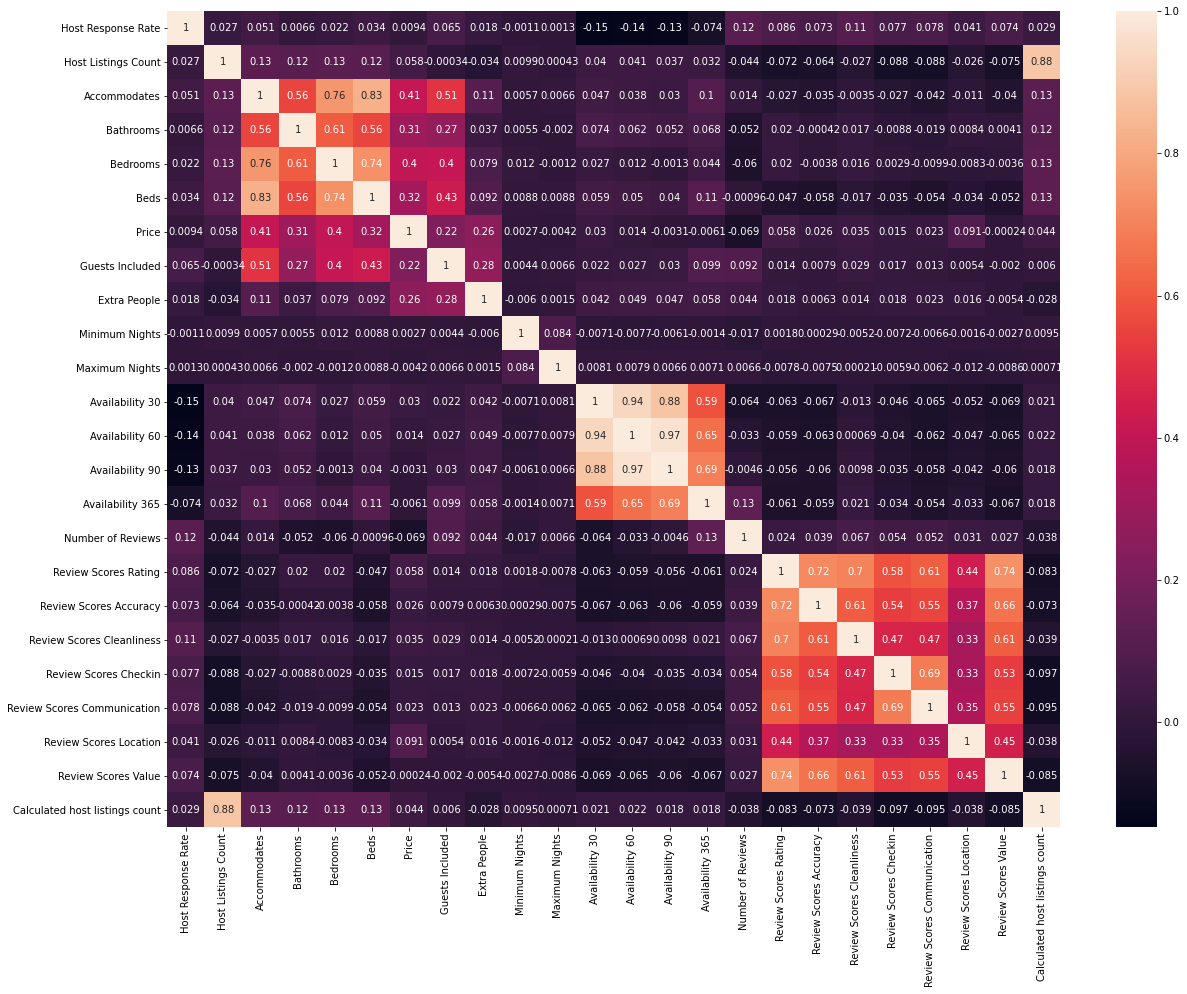

In [17]:
plt.figure(figsize=(20,15))
sns.heatmap(df1.corr(),annot=True)
plt.show()

### Checking distribution

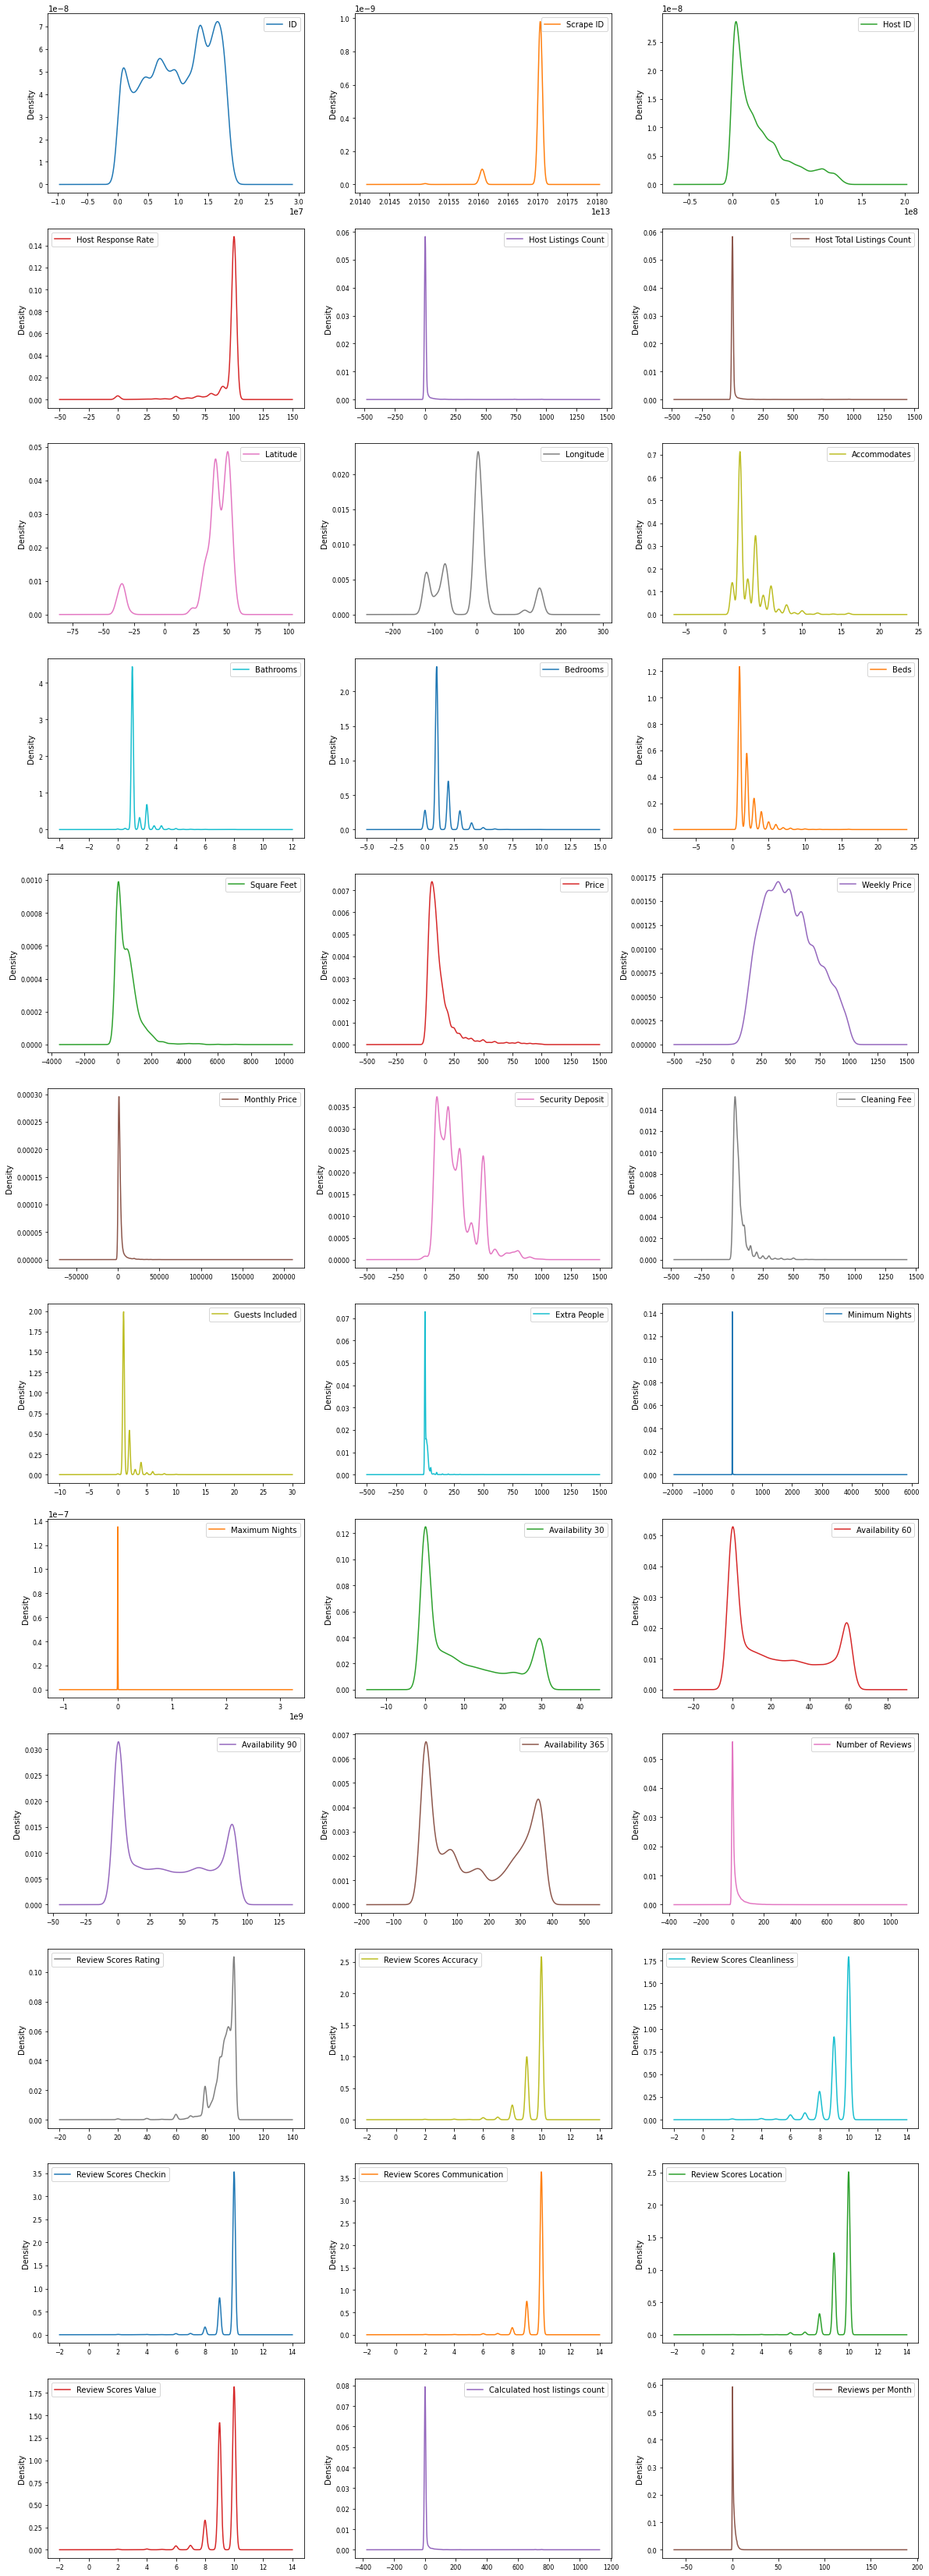

In [13]:
df.plot(kind='density', subplots=True, layout=(12,3), sharex=False, sharey=False,fontsize=8,figsize = (20, 60))
plt.show()

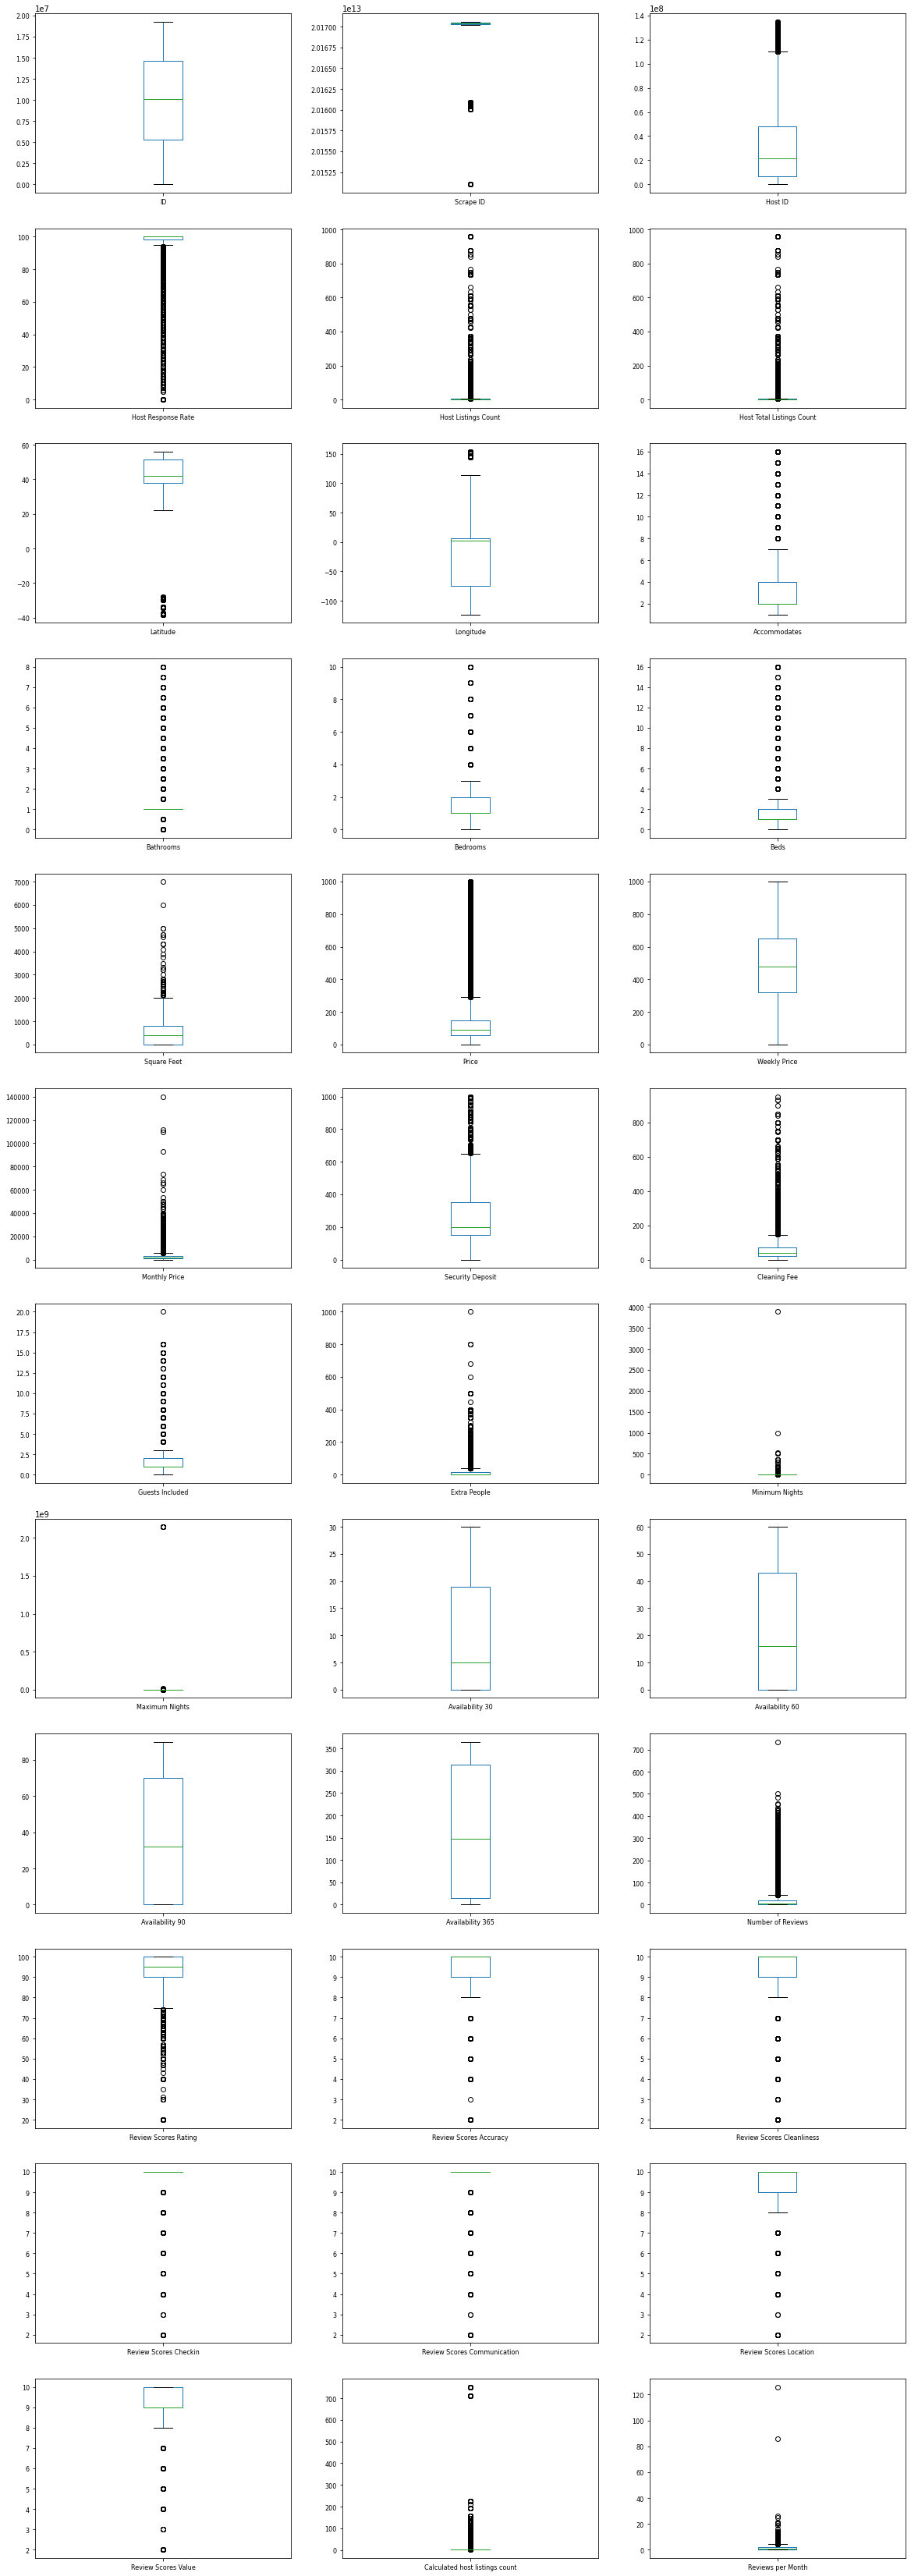

In [14]:
df.plot(kind='box', subplots=True, layout=(12,3), sharex=False, sharey=False,fontsize=8,figsize = (20, 60))
plt.show()

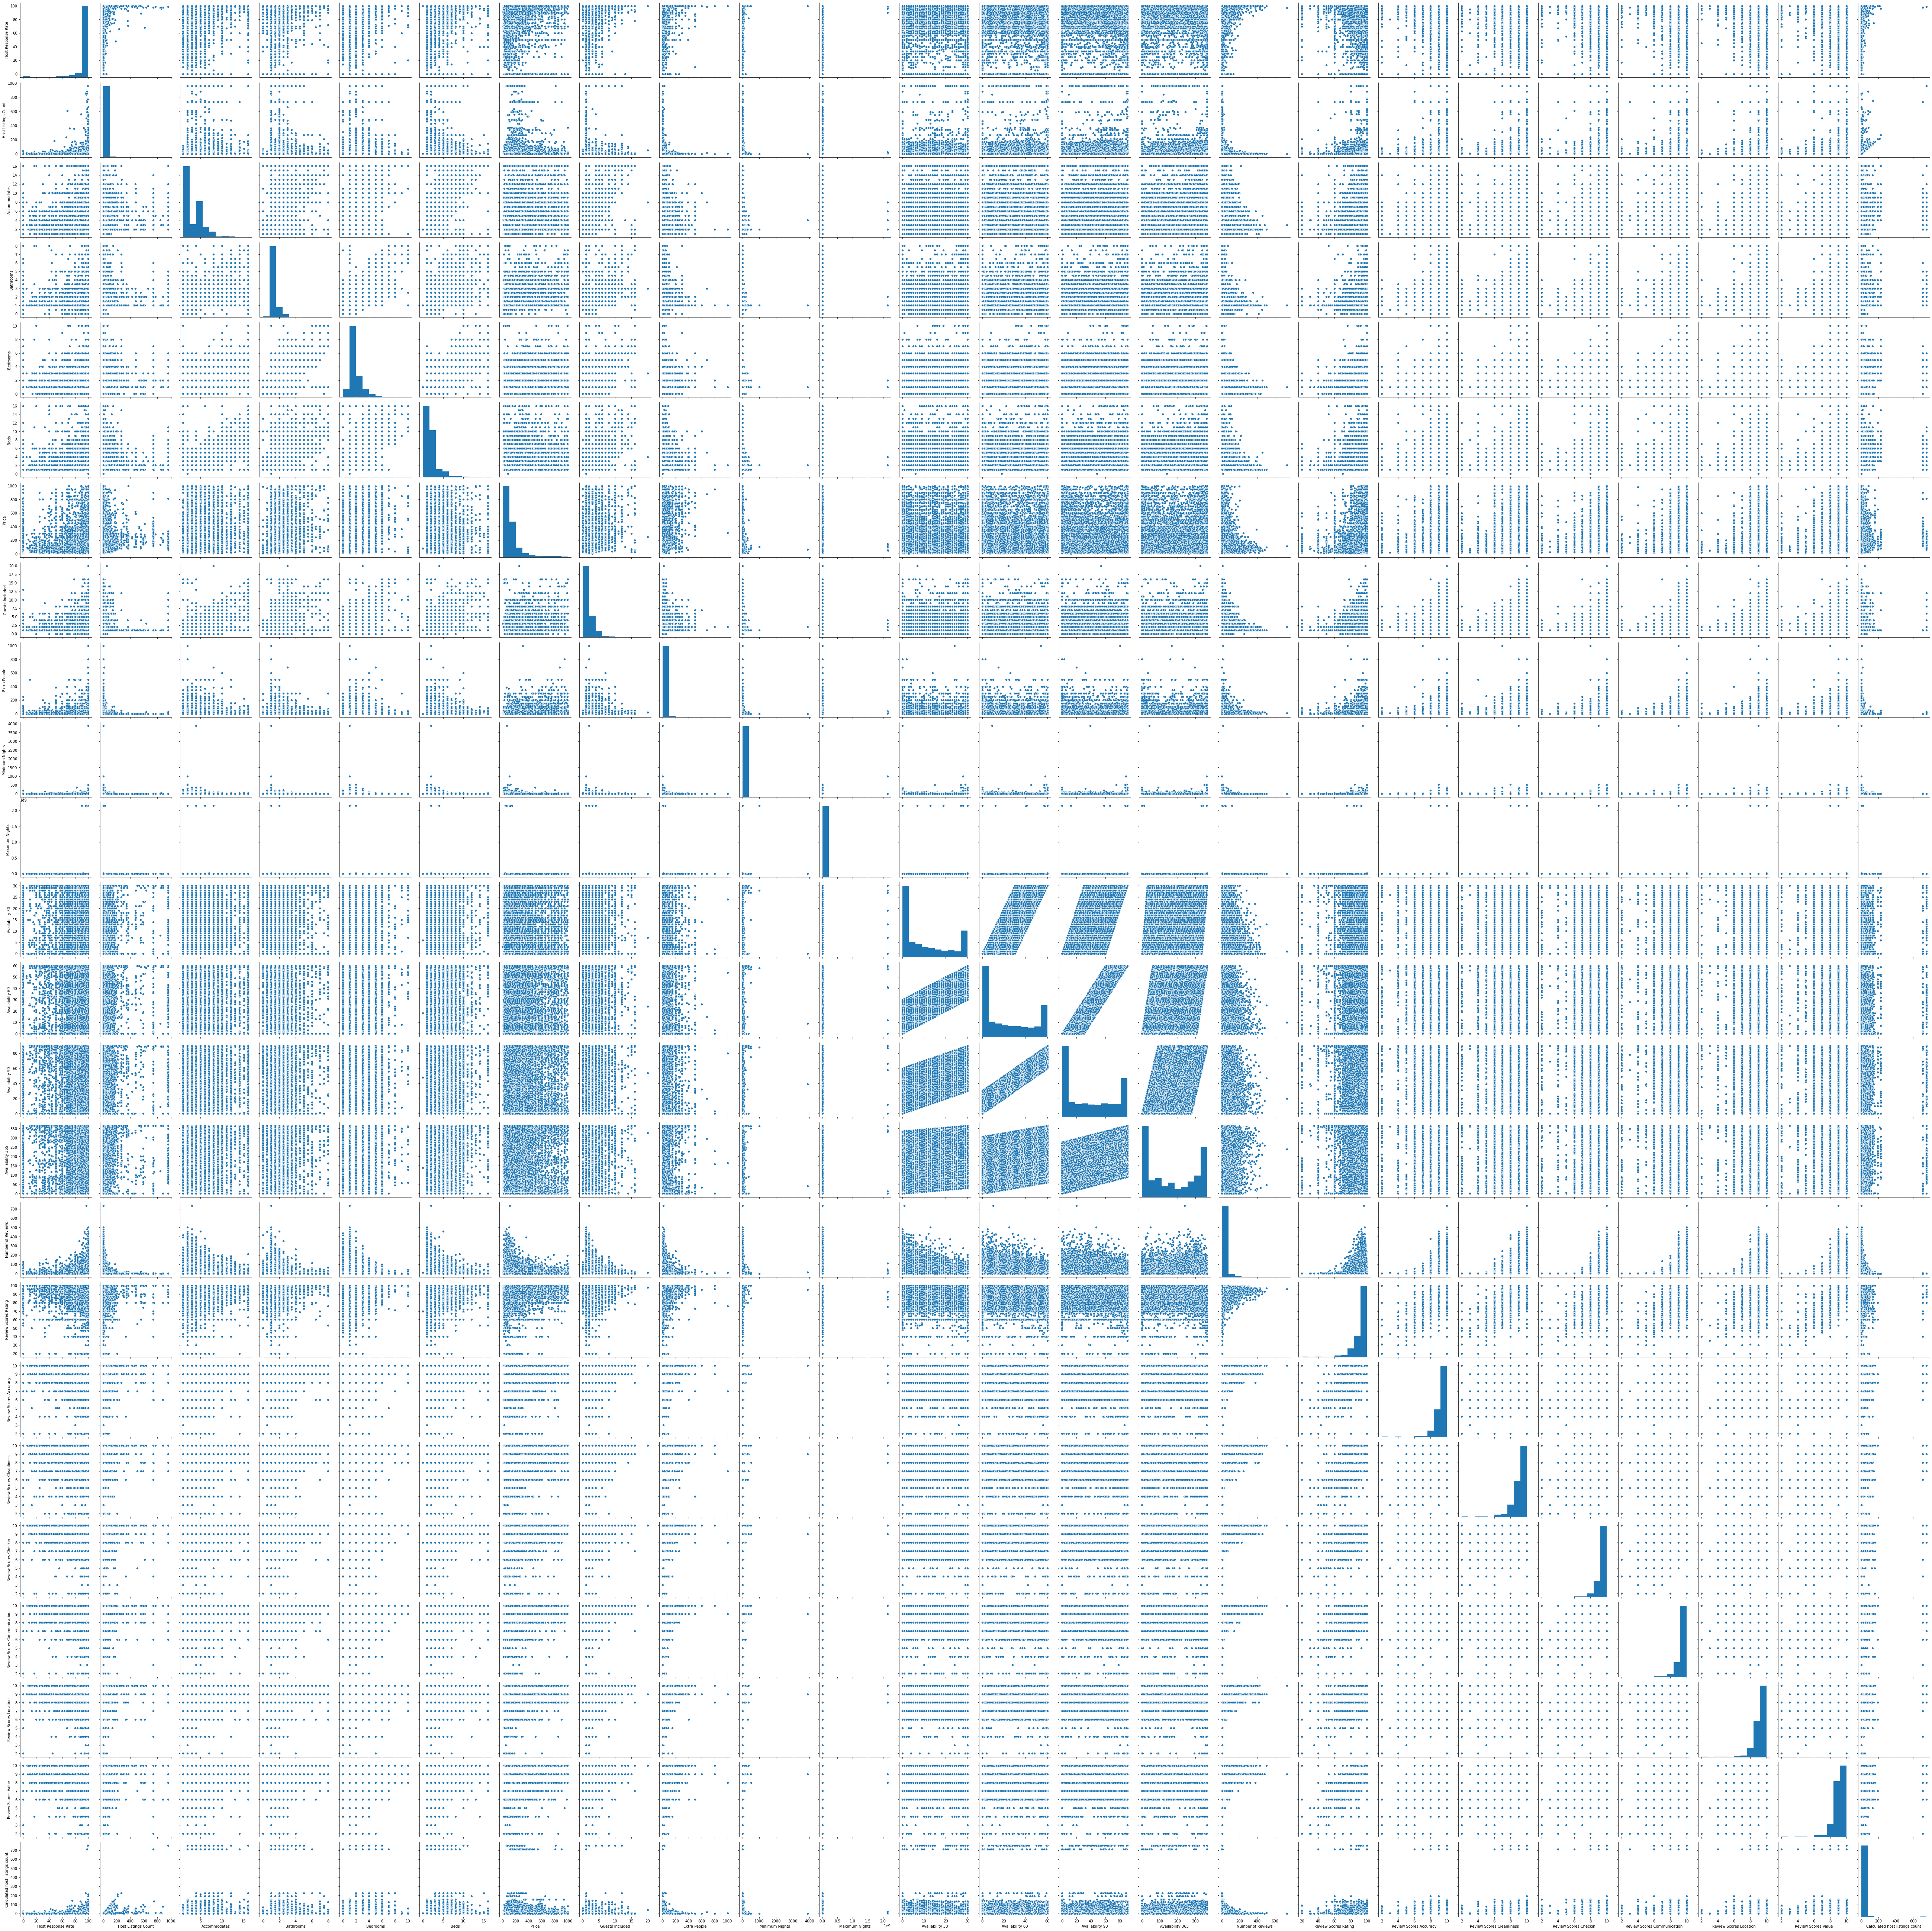

In [38]:
sns.pairplot(df1,height=3,;layout()) # scatter matrix
plt.show()

In [46]:
df1.select_dtypes(include="object").nunique()

Experiences Offered       5
Host Response Time        4
City                   1917
State                   514
Market                   76
Country                  18
Property Type            35
Room Type                 3
Bed Type                  5
Calendar Updated         72
Cancellation Policy      11
dtype: int64

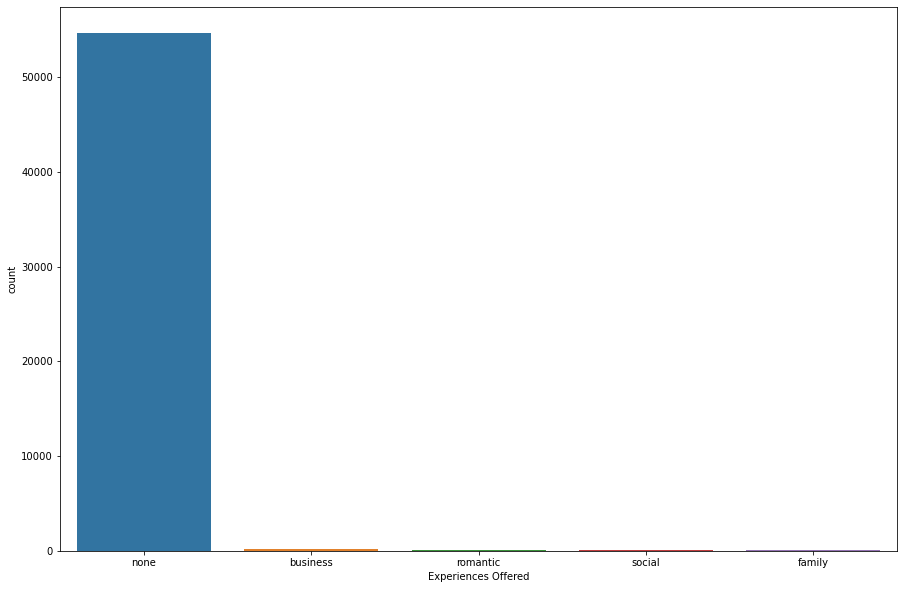

In [9]:
plt.figure(figsize=(15,10))
sns.countplot(x = df1["Experiences Offered"])
plt.show()

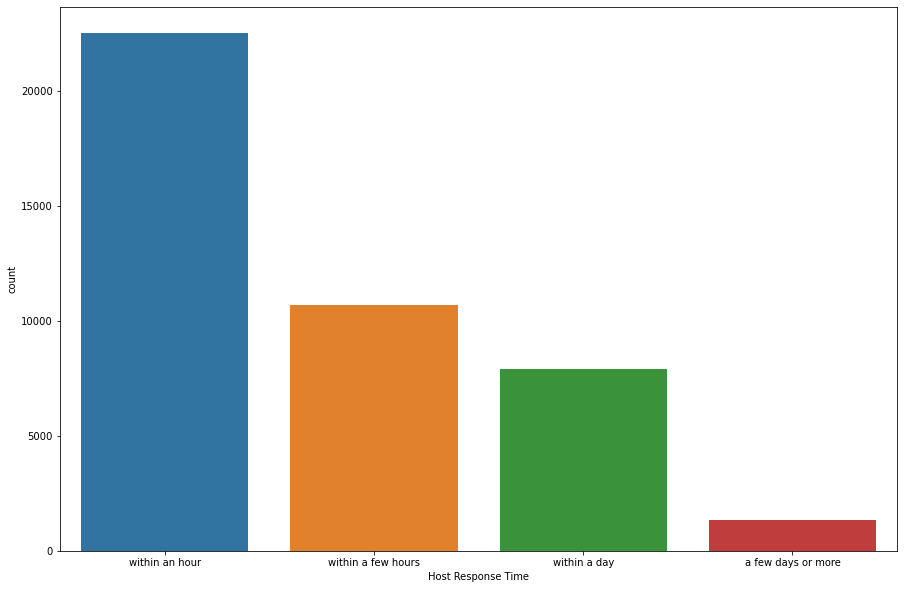

In [10]:
plt.figure(figsize=(15,10))
sns.countplot(x = df1["Host Response Time"])
plt.show()

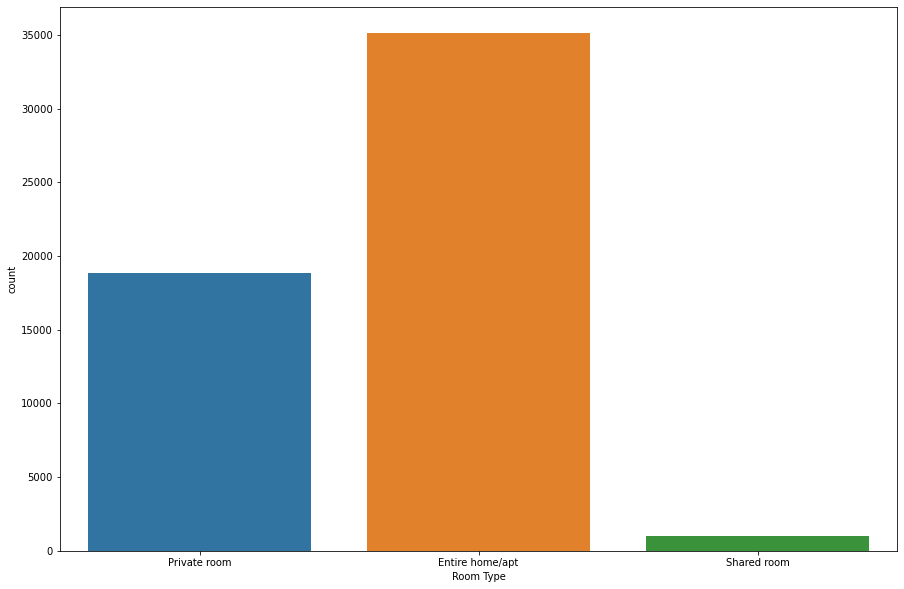

In [11]:
plt.figure(figsize=(15,10))
sns.countplot(x = df1["Room Type"])
plt.show()

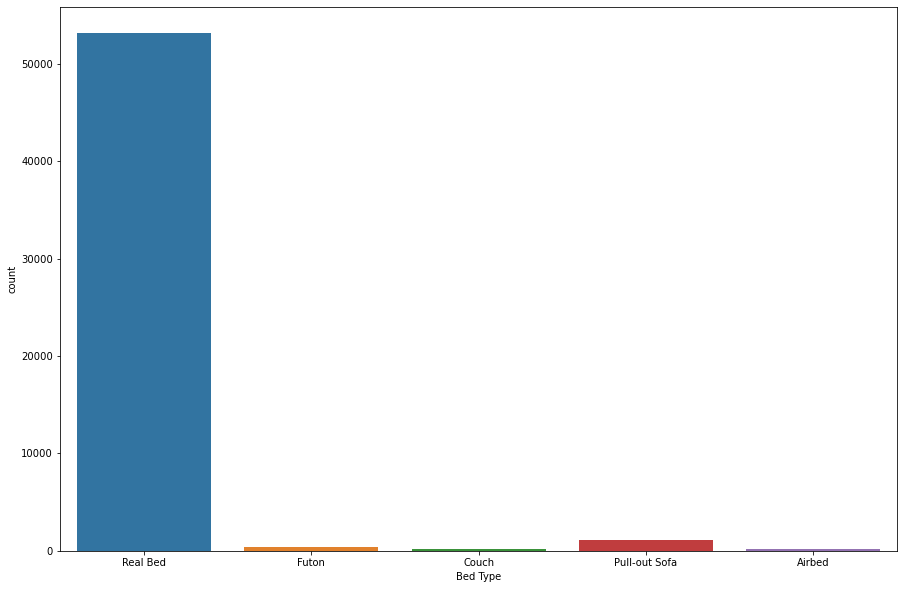

In [12]:
plt.figure(figsize=(15,10))
sns.countplot(x = df1["Bed Type"])
plt.show()

# Checking missing values

In [20]:
df1.isnull().sum()

Experiences Offered                   0
Host Response Time                12610
Host Response Rate                12610
Host Listings Count                  52
City                                 54
State                              5307
Market                              653
Country                               1
Property Type                         0
Room Type                             0
Accommodates                         11
Bathrooms                           171
Bedrooms                             63
Beds                                104
Bed Type                              0
Price                               772
Guests Included                       0
Extra People                          3
Minimum Nights                        0
Maximum Nights                        0
Calendar Updated                      0
Availability 30                       0
Availability 60                       0
Availability 90                       0
Availability 365                      0


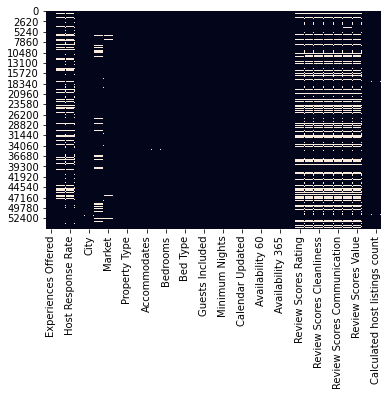

In [21]:
sns.heatmap(df1.isnull(), cbar = False)
plt.show()

# Code for KNN Imputation loaded above

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)

df_filled = imputer.fit_transform(df1.select_dtypes(exclude="object"))

l=df1.select_dtypes(exclude="object").columns

df2=pd.DataFrame(df_filled,columns=l)

In [7]:
df2.head()

Host Response Rate  Host Listings Count  Accommodates  Bathrooms  Bedrooms  \
0               100.0                  1.0           2.0        1.0       1.0   
1               100.0                  2.0           4.0        1.0       2.0   
2               100.0                  1.0           4.0        1.0       1.0   
3               100.0                  3.0           2.0        1.0       1.0   
4               100.0                 14.0           5.0        1.0       2.0   

   Beds  Price  Guests Included  Extra People  Minimum Nights  ...  \
0   1.0   30.0              1.0           0.0             1.0  ...   
1   2.0   70.0              4.0           0.0             2.0  ...   
2   2.0  149.0              2.0          15.0             2.0  ...   
3   1.0   45.0              1.0           0.0             2.0  ...   
4   3.0   69.0              1.0          19.0             1.0  ...   

   Availability 365  Number of Reviews  Review Scores Rating  \
0             229.0              165.0                  78.0   
1             212.0               14.0                  87.0   
2             201.0               60.0                  96.0   
3             352.0               17.0                  83.0   
4             192.0              116.0                  84.0   

   Review Scores Accuracy  Review Scores Cleanliness  Review Scores Checkin  \
0                     9.0                        8.0                    8.0   
1                    10.0                        9.0                    9.0   
2                    10.0                        9.0                   10.0   
3                     9.0                        8.0                    9.0   
4                     9.0                        9.0                    9.0   

   Review Scores Communication  Review Scores Location  Review Scores Value  \
0                          8.0                     9.0                  8.0   
1                          9.0                     9.0                  9.0   
2                         10.0                     9.0                  9.0   
3                         10.0                    10.0                  8.0   
4                          9.0                     9.0                  9.0   

   Calculated host listings count  
0                             1.0  
1                             2.0  
2                             1.0  
3                             3.0  
4                            13.0  

[5 rows x 24 columns]

In [8]:
df2.isnull().sum()

Host Response Rate                0
Host Listings Count               0
Accommodates                      0
Bathrooms                         0
Bedrooms                          0
Beds                              0
Price                             0
Guests Included                   0
Extra People                      0
Minimum Nights                    0
Maximum Nights                    0
Availability 30                   0
Availability 60                   0
Availability 90                   0
Availability 365                  0
Number of Reviews                 0
Review Scores Rating              0
Review Scores Accuracy            0
Review Scores Cleanliness         0
Review Scores Checkin             0
Review Scores Communication       0
Review Scores Location            0
Review Scores Value               0
Calculated host listings count    0
dtype: int64

### Using FeatureHasher to encode City and State columns into numerical values 

In [47]:
df1.select_dtypes(include="object").nunique()

Experiences Offered       5
Host Response Time        4
City                   1917
State                   514
Market                   76
Country                  18
Property Type            35
Room Type                 3
Bed Type                  5
Calendar Updated         72
Cancellation Policy      11
dtype: int64

In [9]:
df1["City"]=str(df1['City'])
df1["State"]=str(df1['State'])

In [10]:
from sklearn.feature_extraction import FeatureHasher
fh = FeatureHasher(n_features=10, input_type='string')
hashed_features = fh.fit_transform(df1['City'])
hashed_features = hashed_features.toarray()
hashed_features_state = fh.fit_transform(df1['State'])
hashed_features_state = hashed_features_state.toarray()
d=pd.concat([pd.DataFrame(hashed_features),pd.DataFrame(hashed_features_state)], axis=1)

### Get_dummies to remaining catagorical features with less unique values

In [13]:
df1=df1.drop(["State","City"],axis=1)

In [14]:
df_fill2=pd.get_dummies(df1.select_dtypes(include="object"))

In [15]:
df_filled2 = imputer.fit_transform(df_fill2)

In [16]:
c=df_fill2.columns

In [17]:
df3=pd.DataFrame(df_filled2,columns=c)

In [18]:
dfmain=pd.concat([df2,df3,d],axis=1)

In [19]:
dfmain.shape

(55000, 273)

In [20]:
dfmain.head()

Host Response Rate  Host Listings Count  Accommodates  Bathrooms  Bedrooms  \
0               100.0                  1.0           2.0        1.0       1.0   
1               100.0                  2.0           4.0        1.0       2.0   
2               100.0                  1.0           4.0        1.0       1.0   
3               100.0                  3.0           2.0        1.0       1.0   
4               100.0                 14.0           5.0        1.0       2.0   

   Beds  Price  Guests Included  Extra People  Minimum Nights  ...     0    1  \
0   1.0   30.0              1.0           0.0             1.0  ...  30.0 -1.0   
1   2.0   70.0              4.0           0.0             2.0  ...  30.0 -1.0   
2   2.0  149.0              2.0          15.0             2.0  ...  30.0 -1.0   
3   1.0   45.0              1.0           0.0             2.0  ...  30.0 -1.0   
4   3.0   69.0              1.0          19.0             1.0  ...  30.0 -1.0   

       2    3    4    5    6     7    8    9  
0  115.0  0.0 -3.0 -1.0  0.0 -24.0  0.0 -8.0  
1  115.0  0.0 -3.0 -1.0  0.0 -24.0  0.0 -8.0  
2  115.0  0.0 -3.0 -1.0  0.0 -24.0  0.0 -8.0  
3  115.0  0.0 -3.0 -1.0  0.0 -24.0  0.0 -8.0  
4  115.0  0.0 -3.0 -1.0  0.0 -24.0  0.0 -8.0  

[5 rows x 273 columns]

In [21]:
X=dfmain.drop(["Price"],axis=1)
y=dfmain.Price

In [22]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [23]:
from sklearn.model_selection import train_test_split 
seed = 10
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state = seed)

# Random Forest Regressor

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [25]:
m=RandomForestRegressor()

In [44]:
m.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [45]:
y_train_pred = m.predict(X_train)
y_test_pred = m.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error
#print(LR_model1.score(X_train, y_train))
print ("R-squared Training",r2_score(y_train, y_train_pred))
print ("R-squared Testing",r2_score(y_test, y_test_pred))
print ("Train RMSE : ",np.sqrt(mean_squared_error(y_train, y_train_pred)))
print ("Test RMSE : ",np.sqrt(mean_squared_error(y_test, y_test_pred)))

R-squared Training 0.9534748956827677
R-squared Testing 0.656342443491584
Train RMSE :  31.588138297881606
Test RMSE :  83.89504430842655


In [46]:
param_grid={'bootstrap': [True],
            'max_depth': [10],
            'max_features': ['auto','sqrt'],
            'min_samples_leaf': [4,8],
            'min_samples_split': [6,10],
            'n_estimators': [100]}
RFRegressor = GridSearchCV(RandomForestRegressor(),param_grid, cv=10,n_jobs=-1)
RFRegressor.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_j

In [47]:
RFRegressor.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 8,
 'min_samples_split': 6,
 'n_estimators': 100}

In [48]:
RF_model=RFRegressor.best_estimator_
RF_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=8,
                      min_samples_split=6, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [49]:
y_train_pred = RF_model.predict(X_train)
y_test_pred = RF_model.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error
#print(LR_model1.score(X_train, y_train))
print ("R-squared Training",r2_score(y_train, y_train_pred))
print ("R-squared Testing",r2_score(y_test, y_test_pred))
print ("Train RMSE : ",np.sqrt(mean_squared_error(y_train, y_train_pred)))
print ("Test RMSE : ",np.sqrt(mean_squared_error(y_test, y_test_pred)))

R-squared Training 0.7183824484893954
R-squared Testing 0.6313144081691943
Train RMSE :  77.71595928820868
Test RMSE :  86.89633139872826


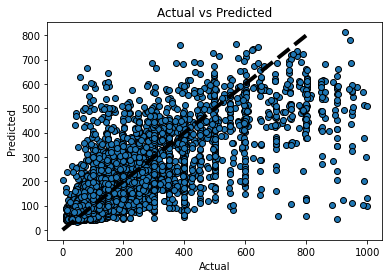

In [50]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_test_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test_pred.max()], [y_test.min(), y_test_pred.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

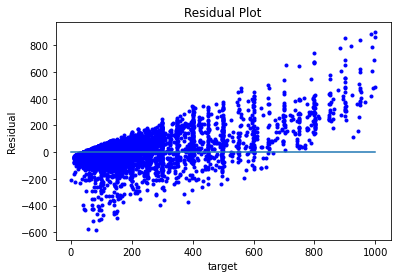

In [54]:
res = y_test - y_test_pred
plt.plot(y_test,res,'b.')
plt.plot([1000,0],[0,0])
plt.xlabel("target")
plt.ylabel("Residual")
plt.title("Residual Plot")
plt.show()

# Lasso

In [55]:
from sklearn.linear_model import Lasso

In [56]:
params =  {'alpha':[0.01,1,10,50]}
lasso_grid = GridSearchCV(Lasso(),param_grid=params,n_jobs=-1)
lasso_grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.01, 1, 10, 50]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [57]:
lasso_grid.best_estimator_

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [58]:
Lasso_model_1=lasso_grid.best_estimator_.fit(X_train,y_train)

In [59]:
y_train_pred = Lasso_model_1.predict(X_train)
y_pred = Lasso_model_1.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error
print ("R-squared Training",r2_score(y_train, y_train_pred))
print ("R-squared Testing",r2_score(y_test, y_pred))
print ("Train RMSE : ",np.sqrt(mean_squared_error(y_train, y_train_pred)))
print ("Test RMSE  : ",np.sqrt(mean_squared_error(y_test, y_pred)))

R-squared Training 0.6174748517817192
R-squared Testing 0.6055682085309908
Train RMSE :  90.57541843140262
Test RMSE  :  89.87922415433188


In [60]:
coeff_used = np.sum(Lasso_model_1.coef_!=0)
print("number of features used: ", coeff_used)

number of features used:  227


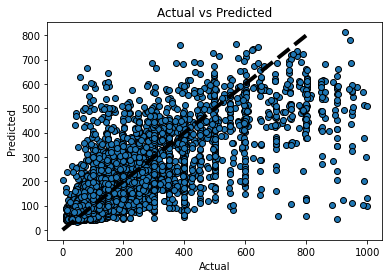

In [68]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_test_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test_pred.max()], [y_test.min(), y_test_pred.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

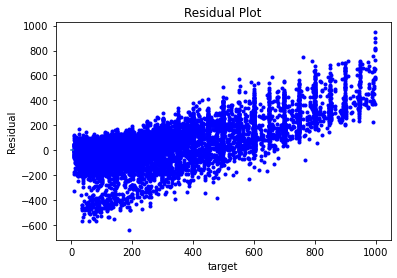

In [69]:
res = y_train - y_train_pred
plt.plot(y_train,res,'b.')
plt.plot([-1,6],[0,0])
plt.xlabel("target")
plt.ylabel("Residual")
plt.title("Residual Plot")
plt.show()

# MLR

### A variance inflation factor(VIF) to detect multicollinearity

In [72]:
#Using user defined function to calculate VIF Score
import statsmodels.formula.api as smf
def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0, xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=smf.ols(formula='y~x', data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print( " VIF score for", xvar_names[i], "is:" , vif)
vif_cal(df1.select_dtypes(np.number),'Price')

 VIF score for Host Response Rate is: 1.04
 VIF score for Host Listings Count is: 3.6
 VIF score for Accommodates is: 4.13
 VIF score for Bathrooms is: 1.61
 VIF score for Bedrooms is: 2.77
 VIF score for Beds is: 3.49
 VIF score for Guests Included is: 1.58
 VIF score for Extra People is: 1.09
 VIF score for Minimum Nights is: 1.0
 VIF score for Maximum Nights is: 1.0
 VIF score for Availability 30 is: 7.33
 VIF score for Availability 60 is: 27.28
 VIF score for Availability 90 is: 15.81
 VIF score for Availability 365 is: 1.6
 VIF score for Number of Reviews is: 1.06
 VIF score for Review Scores Rating is: 3.7
 VIF score for Review Scores Accuracy is: 2.48
 VIF score for Review Scores Cleanliness is: 2.15
 VIF score for Review Scores Checkin is: 2.21
 VIF score for Review Scores Communication is: 2.36
 VIF score for Review Scores Location is: 1.31
 VIF score for Review Scores Value is: 2.61
 VIF score for Calculated host listings count is: 3.59


In [86]:
df2=df2.drop(["Availability 60"],axis=1)

In [87]:
#Using user defined function to calculate VIF Score
import statsmodels.formula.api as smf
def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0, xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=smf.ols(formula='y~x', data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print( " VIF score for", xvar_names[i], "is:" , vif)
vif_cal(df2.select_dtypes(np.number),'Price')

 VIF score for Host Response Rate is: 1.06
 VIF score for Host Listings Count is: 4.61
 VIF score for Accommodates is: 4.05
 VIF score for Bathrooms is: 1.68
 VIF score for Bedrooms is: 2.9
 VIF score for Beds is: 3.55
 VIF score for Guests Included is: 1.47
 VIF score for Extra People is: 1.09
 VIF score for Minimum Nights is: 1.01
 VIF score for Maximum Nights is: 1.01
 VIF score for Availability 30 is: 4.67
 VIF score for Availability 90 is: 5.79
 VIF score for Availability 365 is: 2.05
 VIF score for Number of Reviews is: 1.09
 VIF score for Review Scores Rating is: 3.45
 VIF score for Review Scores Accuracy is: 2.36
 VIF score for Review Scores Cleanliness is: 2.17
 VIF score for Review Scores Checkin is: 2.09
 VIF score for Review Scores Communication is: 2.19
 VIF score for Review Scores Location is: 1.32
 VIF score for Review Scores Value is: 2.55
 VIF score for Calculated host listings count is: 4.61


In [26]:
dfmain.drop(["Availability 30"],axis=1)

Host Response Rate  Host Listings Count  Accommodates  Bathrooms  \
0                   100.0                  1.0           2.0        1.0   
1                   100.0                  2.0           4.0        1.0   
2                   100.0                  1.0           4.0        1.0   
3                   100.0                  3.0           2.0        1.0   
4                   100.0                 14.0           5.0        1.0   
...                   ...                  ...           ...        ...   
54995               100.0                  1.0           6.0        1.0   
54996                96.0                  1.0           8.0        2.0   
54997                50.0                  1.0           2.0        1.0   
54998               100.0                  1.0           4.0        1.0   
54999                93.0                  6.0           2.0        1.0   

       Bedrooms  Beds  Price  Guests Included  Extra People  Minimum Nights  \
0           1.0   1.0   30.0              1.0           0.0             1.0   
1           2.0   2.0   70.0              4.0           0.0             2.0   
2           1.0   2.0  149.0              2.0          15.0             2.0   
3           1.0   1.0   45.0              1.0           0.0             2.0   
4           2.0   3.0   69.0              1.0          19.0             1.0   
...         ...   ...    ...              ...           ...             ...   
54995       2.0   5.0  135.0              4.0          25.0            30.0   
54996       4.0   4.0  250.0              4.0          20.0             3.0   
54997       1.0   1.0   70.0              1.0           0.0            15.0   
54998       1.0   1.0  119.0              1.0           0.0             2.0   
54999       1.0   1.0   55.0              1.0          20.0            15.0   

       ...     0    1      2    3    4    5    6     7    8    9  
0      ...  30.0 -1.0  115.0  0.0 -3.0 -1.0  0.0 -24.0  0.0 -8.0  
1      ...  30.0 -1.0  115.0  0.0 -3.0 -1.0  0.0 -24.0  0.0 -8.0  
2      ...  30.0 -1.0  115.0  0.0 -3.0 -1.0  0.0 -24.0  0.0 -8.0  
3      ...  30.0 -1.0  115.0  0.0 -3.0 -1.0  0.0 -24.0  0.0 -8.0  
4      ...  30.0 -1.0  115.0  0.0 -3.0 -1.0  0.0 -24.0  0.0 -8.0  
...    ...   ...  ...    ...  ...  ...  ...  ...   ...  ...  ...  
54995  ...  30.0 -1.0  115.0  0.0 -3.0 -1.0  0.0 -24.0  0.0 -8.0  
54996  ...  30.0 -1.0  115.0  0.0 -3.0 -1.0  0.0 -24.0  0.0 -8.0  
54997  ...  30.0 -1.0  115.0  0.0 -3.0 -1.0  0.0 -24.0  0.0 -8.0  
54998  ...  30.0 -1.0  115.0  0.0 -3.0 -1.0  0.0 -24.0  0.0 -8.0  
54999  ...  30.0 -1.0  115.0  0.0 -3.0 -1.0  0.0 -24.0  0.0 -8.0  

[55000 rows x 272 columns]

In [28]:
from sklearn.preprocessing import power_transform
scaled_df_2 =power_transform(dfmain,method='yeo-johnson')
scaled_df_2= pd.DataFrame(scaled_df_2, columns=dfmain.columns)

In [29]:
X3=scaled_df_2.drop(["Price"],axis=1)
y3=scaled_df_2["Price"]

# With Transform

In [30]:
from sklearn.model_selection import train_test_split 
seed = 10
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state = seed)

In [31]:
#Model training
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
model = LinearRegression()
MLR_model_no_outlier = model.fit(X_train3, y_train3)

y_train_pred = MLR_model_no_outlier.predict(X_train3)
y_test_pred = MLR_model_no_outlier.predict(X_test3)
print ("R-squared Training",r2_score(y_train3, y_train_pred))
print ("R-squared Testing",r2_score(y_test3,y_test_pred))
print ("Train RMSE : ",np.sqrt(mean_squared_error(y_train3, y_train_pred)))
print ("Test RMSE : ",np.sqrt(mean_squared_error(y_test3, y_test_pred)))

R-squared Training 0.7031268575334177
R-squared Testing -4.765045184469515e+24
Train RMSE :  0.5453995940874533
Test RMSE :  2173860463740.0444


In [35]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
kfold1=KFold(n_splits=10)
r1=cross_val_score(MLR_model_no_outlier,X_train3,y_train3,cv=kfold1,scoring='r2')
print("R-squared Training",r1.mean())

R-squared Training -2.769862551702009e+26


In [36]:
kfold1=KFold(n_splits=10)
result2=cross_val_score(MLR_model_no_outlier,X_test3,y_test3,cv=kfold1,scoring='r2')
print("R-squared Testing",result2.mean())

R-squared Testing -9.928778136285386e+26


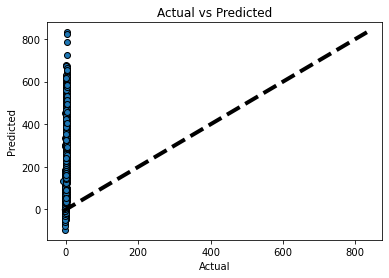

In [37]:
# Diagnosis of Model
# Checking Linearity Assusmption and Constant Variance of Residual Terms
fig, ax = plt.subplots()
ax.scatter(y_test3, y_test_pred, edgecolors=(0, 0, 0))
ax.plot([y_test3.min(), y_test_pred.max()], [y_test3.min(), y_test_pred.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()


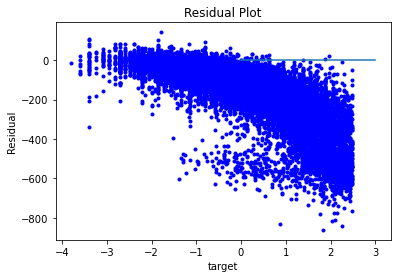

In [38]:
res = y_train3 - y_train_pred
plt.plot(y_train3,res,'b.')
plt.plot([3,0],[0,0])
plt.xlabel("target")
plt.ylabel("Residual")
plt.title("Residual Plot")
plt.show()


0.8307392230874441

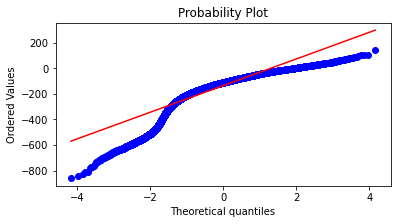

In [39]:
#Checming Normality Condition
import scipy as sp
fig, ax = plt.subplots(figsize=(6,3))
_, (__, ___, r) = sp.stats.probplot(res.ravel(), plot=ax, fit=True)
r**2

In [ ]:
# Boosting

In [61]:
bins = 50*np.arange(10)
binned_y = np.digitize(y,bins,right=False)

In [62]:
from sklearn.model_selection import train_test_split
seed=10
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=seed,stratify=binned_y)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
param_grid =  {
              'max_depth':[5,7],
              'min_samples_split':[10,15],
              'min_samples_leaf':[12,15],
              'n_estimators':[100],
              'learning_rate':[0.001,0.01,0.05,0.3],
               'loss':['ls','huber']
              }
Boosted_Regressor = GridSearchCV(GradientBoostingRegressor(warm_start=True),
                                  param_grid,cv=10,n_jobs=-1)
Boosted_Regressor.fit(X_train,y_train)

In [ ]:
Boosted_Regressor.best_params_

In [ ]:
GradientBoosting_model_1=Boosted_Regressor.best_estimator_.fit(X_train,y_train)

In [ ]:
y_train_pred = GradientBoosting_model_1.predict(X_train)
y_pred = GradientBoosting_model_1.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error
print ("R-squared Training",r2_score(y_train, y_train_pred))
print ("R-squared Testing",r2_score(y_test, y_pred))
print ("Train RMSE : ",np.sqrt(mean_squared_error(y_train, y_train_pred)))
print ("Test RMSE  : ",np.sqrt(mean_squared_error(y_test, y_pred)))

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_test_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test_pred.max()], [y_test.min(), y_test_pred.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

# SVR

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
#4 Fitting the Support Vector Regression Model to the dataset
# Create your support vector regressor here
from sklearn.svm import SVR
# most important SVR parameter is Kernel type. It can be #linear,polynomial or gaussian SVR. We have a non-linear condition #so we can select polynomial or gaussian but here we select RBF(a #gaussian type) kernel.
regressor = SVR(kernel='linear')
regressor.fit(X,y)
#5 Predicting a new result

In [ ]:
y_train_pred = regressor.predict(X_train)
y_pred = regressor.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error
print ("R-squared Training",r2_score(y_train, y_train_pred))
print ("R-squared Testing",r2_score(y_test, y_pred))
print ("Train RMSE : ",np.sqrt(mean_squared_error(y_train, y_train_pred)))
print ("Test RMSE  : ",np.sqrt(mean_squared_error(y_test, y_pred)))

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_test_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test_pred.max()], [y_test.min(), y_test_pred.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()